In [2]:
# imports
from importlib import reload

import os # a module to interact with the operating system
os.environ["ENDPOINT_URL"]="http://rook-ceph-rgw-nautiluss3.rook"
import numpy as np

import pandas as pd
import xarray
import h5py
import healpy as hp
import time
import scipy.io

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.llc import plotting as llc_plotting

from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs
from ulmo.plotting import plotting as ulmo_plotting
from ulmo.analysis import spatial_plots as sp

In [25]:
evts_v98    = np.load('evts_v98', allow_pickle=True)
hp_lons_v98 = np.load('hp_lons_v98', allow_pickle=True)
hp_lats_v98 = np.load('hp_lats_v98', allow_pickle=True)
meds_v98    = np.load('meds_v98', allow_pickle=True)
evts_llc    = np.load('evts_llc', allow_pickle=True)
hp_lons_llc = np.load('hp_lons_llc', allow_pickle=True)
hp_lats_llc = np.load('hp_lats_llc', allow_pickle=True)
meds_llc    = np.load('meds_llc', allow_pickle=True)
evts_mod    = np.load('evts_mod', allow_pickle=True)
hp_lons_mod = np.load('hp_lons_mod', allow_pickle=True)
hp_lats_mod = np.load('hp_lats_mod', allow_pickle=True)
meds_mod    = np.load('meds_mod', allow_pickle=True)
evts_non    = np.load('evts_non', allow_pickle=True)
hp_lons_non = np.load('hp_lons_non', allow_pickle=True)
hp_lats_non = np.load('hp_lats_non', allow_pickle=True)
meds_non    = np.load('meds_non', allow_pickle=True)

# Med_LL Spatial Plot Figure

/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


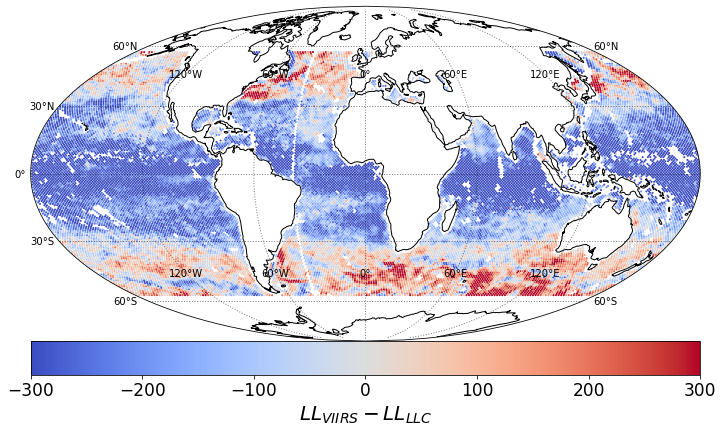

In [5]:
fig = plt.figure(figsize=(12,8))
plt.clf()

tformM = ccrs.Mollweide()
tformP = ccrs.PlateCarree()

ax = plt.axes(projection=tformM)

cm = plt.get_cmap('coolwarm')
# Cut
good = np.invert(meds_v98.mask)
img = plt.scatter(x=hp_lons_llc[good],
    y=hp_lats_llc[good],
    c=meds_v98[good]- meds_llc[good], vmin = -300, vmax = 300, 
    cmap=cm,
    s=1,
    transform=tformP)

# Colorbar
cb = plt.colorbar(img, orientation='horizontal', pad=0.)
clbl = r'$LL_{VIIRS} - LL_{LLC}$'
cb.set_label(clbl, fontsize=20.)
cb.ax.tick_params(labelsize=17)

# Coast lines

ax.coastlines(zorder=10)
ax.set_global()

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, 
    color='black', alpha=0.5, linestyle=':', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}# 'weight': 'bold'}
gl.ylabel_style = {'color': 'black'}# 'weight': 'bold'}
#gl.xlocator = mticker.FixedLocator([-180., -160, -140, -120, -60, -20.])
#gl.xlocator = mticker.FixedLocator([-240., -180., -120, -65, -60, -55, 0, 60, 120.])
#gl.ylocator = mticker.FixedLocator([0., 15., 30., 45, 60.])
plt.savefig('med_LL_diff_VIIRS_vs_LLC', dpi = 600)

/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


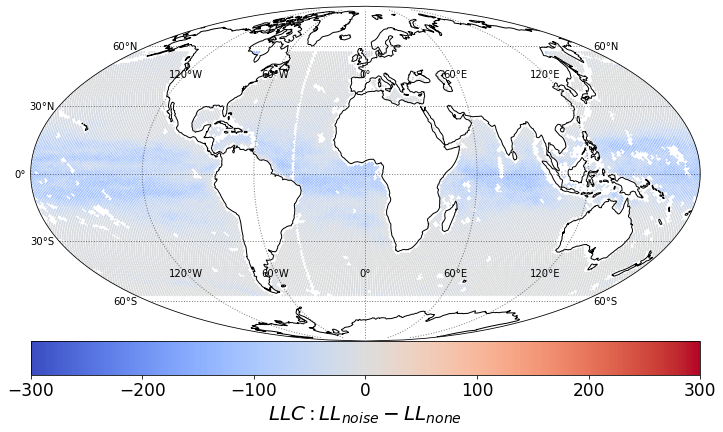

In [27]:
fig = plt.figure(figsize=(12,8))
plt.clf()

tformM = ccrs.Mollweide()
tformP = ccrs.PlateCarree()

ax = plt.axes(projection=tformM)

cm = plt.get_cmap('coolwarm')
# Cut
img = plt.scatter(x=hp_lons_llc,
    y=hp_lats_llc,
    c=meds_llc- meds_non, vmin = -300, vmax = 300, 
    cmap=cm,
    s=1,
    transform=tformP)

# Colorbar
cb = plt.colorbar(img, orientation='horizontal', pad=0.)
clbl = r'$LLC: LL_{noise} - LL_{none}$'
cb.set_label(clbl, fontsize=20.)
cb.ax.tick_params(labelsize=17)

# Coast lines

ax.coastlines(zorder=10)
ax.set_global()

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, 
    color='black', alpha=0.5, linestyle=':', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}# 'weight': 'bold'}
gl.ylabel_style = {'color': 'black'}# 'weight': 'bold'}
#gl.xlocator = mticker.FixedLocator([-180., -160, -140, -120, -60, -20.])
#gl.xlocator = mticker.FixedLocator([-240., -180., -120, -65, -60, -55, 0, 60, 120.])
#gl.ylocator = mticker.FixedLocator([0., 15., 30., 45, 60.])
plt.savefig('med_LL_diff_noise_vs_none_LLC', dpi = 600)

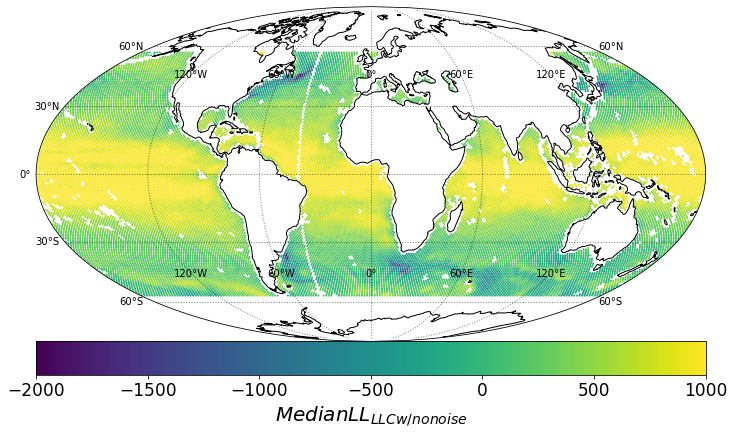

In [31]:
fig = plt.figure(figsize=(12,8))
plt.clf()

tformM = ccrs.Mollweide()
tformP = ccrs.PlateCarree()

ax = plt.axes(projection=tformM)

cm = plt.get_cmap('viridis')
# Cut
good = np.invert(meds_llc.mask)
img = plt.scatter(x=hp_lons_non[good],
    y=hp_lats_non[good],
    c=meds_non[good], vmin = -2000, vmax = 1000, 
    cmap=cm,
    s=1,
    transform=tformP)

# Colorbar
cb = plt.colorbar(img, orientation='horizontal', pad=0.)
clbl = r'$Median LL_{LLC w/ no noise}$'
cb.set_label(clbl, fontsize=20.)
cb.ax.tick_params(labelsize=17)

# Coast lines

ax.coastlines(zorder=10)
ax.set_global()

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, 
    color='black', alpha=0.5, linestyle=':', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}# 'weight': 'bold'}
gl.ylabel_style = {'color': 'black'}# 'weight': 'bold'}
#gl.xlocator = mticker.FixedLocator([-180., -160, -140, -120, -60, -20.])
#gl.xlocator = mticker.FixedLocator([-240., -180., -120, -65, -60, -55, 0, 60, 120.])
#gl.ylocator = mticker.FixedLocator([0., 15., 30., 45, 60.])
plt.savefig('med_LL_LLC_no_noise', dpi = 600)

# Cutout concentration

/tmp/ipykernel_8050/3329565174.py:14: RuntimeWarning: divide by zero encountered in log10
  c=np.log10(evts_v98)[good],


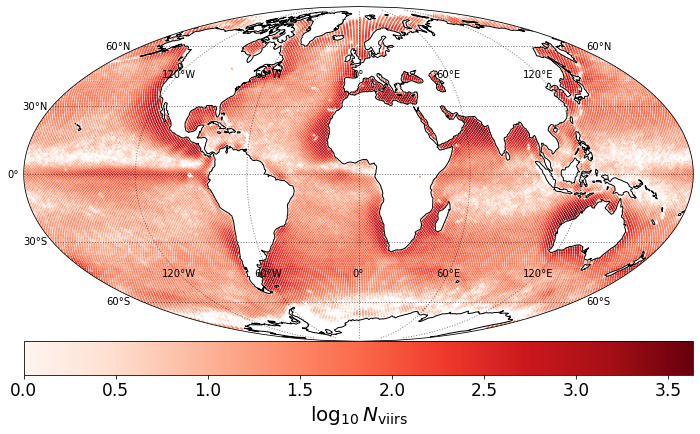

In [11]:
fig = plt.figure(figsize=(12,8))
plt.clf()

tformM = ccrs.Mollweide()
tformP = ccrs.PlateCarree()

ax = plt.axes(projection=tformM)

cm = plt.get_cmap('Reds')
# Cut
good = np.invert(evts_v98.mask)
img = plt.scatter(x=hp_lons_v98[good],
    y=hp_lats_v98[good],
    c=np.log10(evts_v98)[good],
    cmap=cm,
    s=1,
    transform=tformP)

# Colorbar
cb = plt.colorbar(img, orientation='horizontal', pad=0.)
clbl=r'$\log_{10} \, N_{\rm '+'{}'.format('viirs')+'}$'
cb.set_label(clbl, fontsize=20.)
cb.ax.tick_params(labelsize=17)

# Coast lines

ax.coastlines(zorder=10)
ax.set_global()

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, 
    color='black', alpha=0.5, linestyle=':', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}# 'weight': 'bold'}
gl.ylabel_style = {'color': 'black'}# 'weight': 'bold'}
#gl.xlocator = mticker.FixedLocator([-180., -160, -140, -120, -60, -20.])
#gl.xlocator = mticker.FixedLocator([-240., -180., -120, -65, -60, -55, 0, 60, 120.])
#gl.ylocator = mticker.FixedLocator([0., 15., 30., 45, 60.])
plt.savefig('viirs_concentration', dpi = 600)

# Varability in Med LL Diff

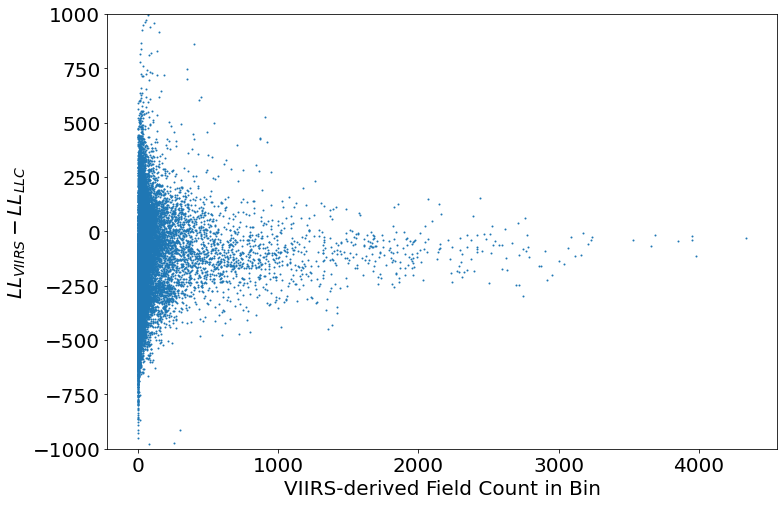

In [14]:
# Figure
fig = plt.figure(figsize=(12,8))
plt.clf()

# Cut
a = meds_v98.mask == False
b = meds_llc.mask == False
c = a & (a==b)

ax = plt.scatter(x= evts_v98[c] , y = meds_v98[c]- meds_llc[c], s=1)

# Axis Labels
plt.xlabel('VIIRS-derived Field Count in Bin', fontsize = 20)
plt.ylabel(r'$LL_{VIIRS} - LL_{LLC}$', fontsize = 20)
plt.ylim(-1000, 1000)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('Variability_med_LL_diff_VIIRS_vs_LLC', dpi = 600)